In [61]:
#公式
formula = '销售价格~卧室数+浴室数+房屋面积+停车面积+房屋评分+建筑年份+纬度+经度'
#实例化
model_1 = ols(formula=formula, data=data)
#拟合模型
model_1 = model_1.fit()
#输出拟合结果
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   销售价格   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2292.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:57:09   Log-Likelihood:            -1.3720e+05
No. Observations:                9995   AIC:                         2.744e+05
Df Residuals:                    9986   BIC:                         2.745e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.27e+07   2.41e+06    -13.563      0.000   -3.74e+07    -2.8e+07
卧室数        -5.072e+04   3188.675    -15.907      0.000    -5.7e+04   -4.45e+04
浴室数         5.729e+04   5032.807     11.383      0.000    4.74e+04    6.72e+04
房屋面积         199.4363      4.985     40.004      0.000     189.664     209.209
停车面积          -0.3178      0.082     -3.855      0.000      -0.479      -0.156
房屋评分        1.138e+05   3253.744     34.960      0.000    1.07e+05     1.2e+05
建筑年份       -3222.4747    101.991    -31.596      0.000   -3422.397   -3022.553
纬度          5.067e+05   1.67e+04     30.352      0.000    4.74e+05    5.39e+05
经度         -1.167e+05   1.82e+04     -6.412      0.000   -1.52e+05    -8.1e+04
==============================================================================
Omnibus:                     8427.113   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           547760.262
Skew:                           3.662   Prob(JB):                         0.00
Kurtosis:                      38.520   Cond. No.                     3.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
data.columns

Index(['销售日期', '销售价格', '卧室数', '浴室数', '房屋面积', '停车面积', '楼层数', '房屋评分', '建筑面积',
       '地下室面积', '建筑年份', '纬度', '经度'],
      dtype='object')

In [35]:
data=data.sort_values('销售日期')
data.head()

,销售日期,销售价格,卧室数,浴室数,房屋面积,停车面积,楼层数,房屋评分,建筑面积,地下室面积,建筑年份,纬度,经度
4786,1970-01-01 00:00:00.020210502,612500,4,2.50,2730,13867.399781,2.0,9,2730,0.0,1991,47.7419,-122.205
3539,1970-01-01 00:00:00.020210502,440000,4,2.25,2160,8119.000000,1.0,8,1080,1080.0,1966,47.5443,-122.177
3566,1970-01-01 00:00:00.020210502,790000,3,2.50,2600,4750.000000,1.0,9,1700,900.0,1951,47.6833,-122.400
7630,1970-01-01 00:00:00.020210502,470000,5,2.50,2210,9655.000000,1.0,8,1460,750.0,1976,47.7698,-122.222
7090,1970-01-01 00:00:00.020210502,491500,4,1.75,2190,125452.000000,1.0,9,2190,0.0,1968,47.2703,-122.069


In [32]:
train_data['销售日期']=pd.to_datetime(train_data['销售日期'],errors='raise')
data = train_data.drop('修复年份',axis=1)

In [31]:
train_data['地下室面积']=train_data['地下室面积'].fillna(train_data[~train_data['地下室面积'].isnull()]['地下室面积'].mean())
train_data['地下室面积'].isnull().sum()
train_data['停车面积']=pd.to_numeric(train_data['停车面积'],errors='coerce')
train_data['停车面积']=train_data['停车面积'].fillna(train_data[~train_data['停车面积'].isnull()]['停车面积'].mean())

0

In [29]:
os.chdir('C:\Data\Jupyter_file\机器学习')
train_data = pd.read_excel('train_data.xlsx')
train_data.shape
train_data.head()

(9995, 14)

,销售日期,销售价格,卧室数,浴室数,房屋面积,停车面积,楼层数,房屋评分,建筑面积,地下室面积,建筑年份,修复年份,纬度,经度
0,20220302,545000,3,2.25,1670,6240,1.0,8,1240,430.0,1974,0.0,47.6413,-122.113
1,20220211,785000,4,2.50,3300,unknown,2.0,10,3300,0.0,1984,0.0,47.6323,-122.036
2,20220107,765000,3,3.25,3190,5283,2.0,9,3190,0.0,2007,0.0,47.5534,-122.002
3,20211103,720000,5,2.50,2900,9525,2.0,9,2900,0.0,1989,0.0,47.5442,-122.138
4,20210603,449500,5,2.75,2040,7488,1.0,7,1200,840.0,1969,0.0,47.7289,-122.172


In [27]:
#常用接口
dir(model)
model.resid

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_exp          76 non-null     float64
 1   gender           76 non-null     int64  
 2   Age              76 non-null     float64
 3   Income           76 non-null     float64
 4   Ownrent          76 non-null     int64  
 5   Selfempl         76 non-null     int64  
 6   dist_home_val    76 non-null     float64
 7   dist_avg_income  76 non-null     float64
 8   edu_class        76 non-null     int64  
 9   edu_1            76 non-null     uint8  
 10  edu_2            76 non-null     uint8  
 11  edu_3            76 non-null     uint8  
 12  edu_4            76 non-null     uint8  
dtypes: float64(5), int64(4), uint8(4)
memory usage: 5.8 KB


In [28]:
#建立模型过程

#公式
formula = 'avg_exp~gender+Age+Income+Ownrent+Selfempl+dist_home_val+dist_avg_income+edu_1+edu_2+edu_3+edu_4'
#实例化
model = ols(formula=formula, data=data)
#拟合模型
model = model.fit()
#输出拟合结果
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     14.93
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           8.36e-14
Time:                        14:04:30   Log-Likelihood:                -519.52
No. Observations:                  76   AIC:                             1063.
Df Residuals:                      64   BIC:                             1091.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         535.9565    223.038      2.403      0.019      90.387     981.526
gender           -447.4828     97.100     -4.608      0.000    -641.463    -253.503
Age                 0.6121      4.779      0.128      0.898      -8.936      10.160
Income           -119.1929     72.411     -1.646      0.105    -263.850      25.464
Ownrent            41.3184     76.416      0.541      0.591    -111.341     193.977
Selfempl          153.7000    129.424      1.188      0.239    -104.853     412.253
dist_home_val       0.1579      0.859      0.184      0.855      -1.557       1.873
dist_avg_income   211.5250     71.122      2.974      0.004      69.442     353.608
edu_1            -262.5083     82.890     -3.167      0.002    -428.100     -96.916
edu_2            -495.1400     92.266     -5.366      0.000    -679.462    -310.818
edu_3            -292.5211    156.617     -1.868      0.066    -605.400      20.358
edu_4              49.3783    294.618      0.168      0.867    -539.188     637.945
==============================================================================
Omnibus:                        0.894   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.613
Skew:                          -0.219   Prob(JB):                        0.736
Kurtosis:                       3.044   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

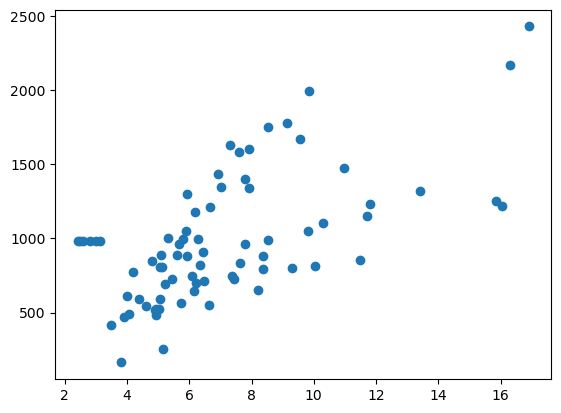

In [24]:
# 散点图
# avg_exp和Income
plt.scatter(data['Income'], data['avg_exp'])

In [ ]:
#热力图
# sns.heatmap(data.corr(), annot=True)   显示具体的相关系数计算结果

sns.heatmap(data.corr())

In [23]:
#分类变量与分类变量的相关系数计算：斯皮尔曼相关系数
data[['gender', 'Ownrent', 'Selfempl', 'edu_class']].corr(method='spearman')

,gender,Ownrent,Selfempl,edu_class
gender,1.000000,0.430469,0.046657,-0.380756
Ownrent,0.430469,1.000000,-0.115370,-0.324743
Selfempl,0.046657,-0.115370,1.000000,0.167669
edu_class,-0.380756,-0.324743,0.167669,1.000000


In [22]:
#分类变量与连续变量的相关系数计算：肯德尔相关系数
data[['avg_exp', 'gender', 'Ownrent', 'Selfempl', 'edu_class']].corr(method='kendall')

,avg_exp,gender,Ownrent,Selfempl,edu_class
avg_exp,1.000000,0.167236,0.290705,0.064150,-0.561243
gender,0.167236,1.000000,0.430469,0.046657,-0.351901
Ownrent,0.290705,0.430469,1.000000,-0.115370,-0.300133
Selfempl,0.064150,0.046657,-0.115370,1.000000,0.154962
edu_class,-0.561243,-0.351901,-0.300133,0.154962,1.000000


In [20]:
#合并到原数据
data = pd.concat([data_raw, dummy], axis=1)
data.head()

,avg_exp,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,edu_class,edu_1,edu_2,edu_3,edu_4
0,1217.03,1,40.0,16.03515,1,1,99.93,15.932789,0,0,0,0,0
1,1251.50,1,32.0,15.84750,1,0,49.88,15.796316,1,1,0,0,0
2,856.57,1,41.0,11.47285,1,0,16.10,11.275632,0,0,0,0,0
3,1321.83,1,28.0,13.40915,1,0,100.39,13.346474,1,1,0,0,0
4,816.03,1,41.0,10.03015,0,1,119.76,10.332263,0,0,0,0,0


In [19]:
#edu_class哑变量转换
dummy = pd.get_dummies(data_raw['edu_class'], prefix='edu', drop_first=True)
dummy.head()

,edu_1,edu_2,edu_3,edu_4
0,0,0,0,0
1,1,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,0,0,0


In [18]:
#寻找异常数据的索引
z[(z>3)|(z<-3)]
#查看异常数据的值
data_raw['Age'].iloc[40]
data_raw['Age'].drop(index=40).mean()   #不包含异常值的均值计算结果
#将异常值使用除异常值之外的数据的均值进行填补
data_raw['Age'].iloc[40] = data_raw['Age'].drop(index=40).mean()

40    8.643062
Name: Age, dtype: float64

999

31.213333333333335

In [17]:
# 3倍标准差
from scipy import stats
#标准化数据(Age)
z = stats.zscore(data_raw['Age'])
z

0    -0.035723
1    -0.108122
2    -0.026673
3    -0.144321
4    -0.026673
        ...   
71   -0.207670
72   -0.216720
73   -0.126221
74   -0.207670
75   -0.198620
Name: Age, Length: 76, dtype: float64

In [13]:
data_raw.head()

,avg_exp,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,edu_class
0,1217.03,1,40,16.03515,1,1,99.93,15.932789,0
1,1251.50,1,32,15.84750,1,0,49.88,15.796316,1
2,856.57,1,41,11.47285,1,0,16.10,11.275632,0
3,1321.83,1,28,13.40915,1,0,100.39,13.346474,1
4,816.03,1,41,10.03015,0,1,119.76,10.332263,0


In [11]:
#方法2：edu_class
label = data_raw['edu_class'].unique().tolist()
#对原数据进行编码
data_raw['edu_class'] = data_raw['edu_class'].apply(lambda x: label.index(x))

In [10]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_exp          76 non-null     float64
 1   gender           76 non-null     int64  
 2   Age              76 non-null     int64  
 3   Income           76 non-null     float64
 4   Ownrent          76 non-null     int64  
 5   Selfempl         76 non-null     int64  
 6   dist_home_val    76 non-null     float64
 7   dist_avg_income  76 non-null     float64
 8   edu_class        75 non-null     object 
dtypes: float64(4), int64(4), object(1)
memory usage: 5.5+ KB


In [9]:
# 数据编码
#方法1：gender
data_raw['gender'] = data_raw['gender'].map({'Male':1, 'Female':0})

In [8]:
#avg_exp
data_raw['avg_exp'].fillna(data_raw['avg_exp'].mean(), inplace=True)

In [7]:
#查看缺失情况
data_raw.isnull().mean()

avg_exp            0.078947
gender             0.000000
Age                0.000000
Income             0.000000
Ownrent            0.000000
Selfempl           0.000000
dist_home_val      0.000000
dist_avg_income    0.000000
edu_class          0.013158
dtype: float64

In [6]:
#查看是否有重复值
data_raw.duplicated().mean()

0.0

In [5]:
#变量'id','Acc','edad2'无用
data_raw.drop(['id','Acc','edad2'], axis=1, inplace=True)    #方法1:inplace

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               76 non-null     int64  
 1   Acc              76 non-null     int64  
 2   avg_exp          70 non-null     float64
 3   gender           76 non-null     object 
 4   Age              76 non-null     int64  
 5   Income           76 non-null     float64
 6   Ownrent          76 non-null     int64  
 7   Selfempl         76 non-null     int64  
 8   dist_home_val    76 non-null     float64
 9   dist_avg_income  76 non-null     float64
 10  edad2            76 non-null     int64  
 11  edu_class        75 non-null     object 
dtypes: float64(4), int64(6), object(2)
memory usage: 7.2+ KB


In [3]:
#读取数据
data_raw = pd.read_excel('LR_practice.xlsx')
data_raw.head()

,id,Acc,avg_exp,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,edad2,edu_class
0,19,1,1217.03,Male,40,16.03515,1,1,99.93,15.932789,1600,研究生
1,5,1,1251.50,Male,32,15.84750,1,0,49.88,15.796316,1024,大学
2,86,1,856.57,Male,41,11.47285,1,0,16.10,11.275632,1681,研究生
3,50,1,1321.83,Male,28,13.40915,1,0,100.39,13.346474,784,大学
4,67,1,816.03,Male,41,10.03015,0,1,119.76,10.332263,1681,研究生


In [2]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('C:\Data\Jupyter_file\统计建模')